## Exploratory Data Analysis (EDA) of Mobile Data: Business Insights for Mobile Companies

### Business Problem:

##### Mobile companies need to analyze market trends, pricing strategies, and consumer preferences to optimize their product offerings, pricing, and marketing strategies. This EDA project will help mobile companies understand:

Price trends across different brands and models.

Performance vs. price analysis.

Market segmentation (flagship vs. budget devices).

Regional pricing variations.

Feature trends (RAM, battery, camera, etc.).

### Step-by-Step EDA Process:


Data Loading & Initial Inspection

Data Cleaning & Preprocessing

Univariate Analysis (Single Variable Insights)

Bivariate Analysis (Relationships Between Variables)

Multivariate Analysis (Advanced Insights)

Key Insights & Recommendations

### 1. Data Loading & Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('MobileData.csv',encoding='unicode_escape')

# Display first 5 rows
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe())


  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999             INR 84,999              

### Observations:


The dataset contains columns like Company Name, Model Name, RAM, Battery Capacity, Launched Price (Pakistan), etc.

Some columns have commas in numbers (e.g., 3,600mAh), which need cleaning.

Launched Year ranges from 2014 to 2025.

### 2. Data Cleaning & Preprocessing

In [2]:
# Step 1: Check original data
print("Original DataFrame shape:", df.shape)

# Step 2: Clean numeric columns
numeric_cols = ['RAM', 'Battery Capacity', 'Launched Price (Pakistan)', 'Launched Price (India)', 
                'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace('[^0-9.]', '', regex=True)  # Keep only numbers and dots
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Handle special columns
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '').astype(float)
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace('mAh', '').astype(float)
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Step 4: Drop only rows where ALL prices are missing
price_cols = [c for c in df.columns if 'Launched Price' in c]
df = df.dropna(subset=price_cols, how='all')

# Step 5: Check results
print("\nCleaned DataFrame shape:", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Original DataFrame shape: (930, 15)

Cleaned DataFrame shape: (930, 15)

Missing values after cleaning:
Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    1
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64


In [3]:
print(df.head(10))

  Company Name               Model Name Mobile Weight  RAM Front Camera  \
0        Apple          iPhone 16 128GB          174g  6.0         12MP   
1        Apple          iPhone 16 256GB          174g  6.0         12MP   
2        Apple          iPhone 16 512GB          174g  6.0         12MP   
3        Apple     iPhone 16 Plus 128GB          203g  6.0         12MP   
4        Apple     iPhone 16 Plus 256GB          203g  6.0         12MP   
5        Apple     iPhone 16 Plus 512GB          203g  6.0         12MP   
6        Apple      iPhone 16 Pro 128GB          206g  6.0    12MP / 4K   
7        Apple      iPhone 16 Pro 256GB          206g  8.0    12MP / 4K   
8        Apple      iPhone 16 Pro 512GB          206g  8.0    12MP / 4K   
9        Apple  iPhone 16 Pro Max 128GB          221g  6.0    12MP / 4K   

   Back Camera   Processor  Battery Capacity  Screen Size  \
0         48MP  A17 Bionic            3600.0          6.1   
1         48MP  A17 Bionic            3600.0        

### 3. Univariate Analysis (Single Variable Insights)

#### a. Distribution of Prices in India

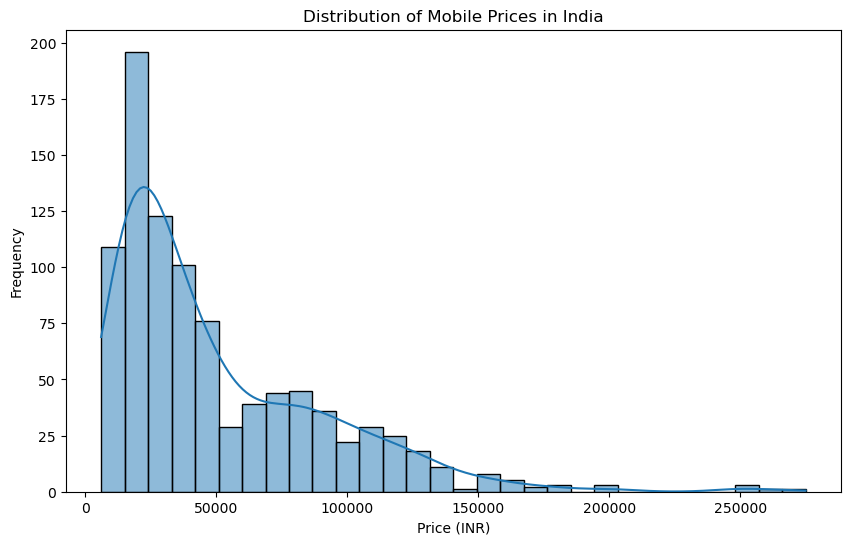

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Launched Price (India)'], bins=30, kde=True)
plt.title('Distribution of Mobile Prices in India')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

#### Insight: Most mobiles are priced below INR 50,000, with a few premium models exceeding INR 100,000.

#### b. Top Mobile Brands

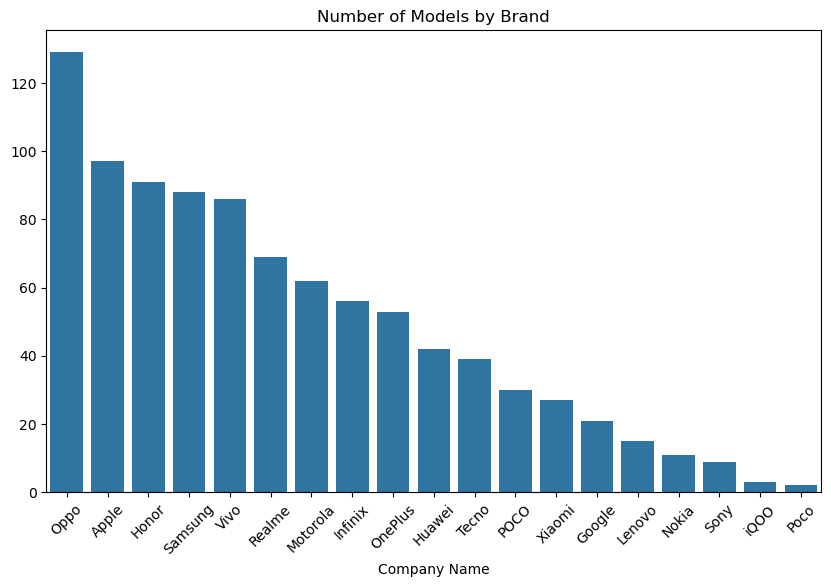

In [7]:
brand_counts = df['Company Name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Models by Brand')
plt.xticks(rotation=45)
plt.show()

#### Insight: Oppo and Apple dominate the dataset, followed by Honor, Samsung, and Vivo.

### c. RAM Distribution

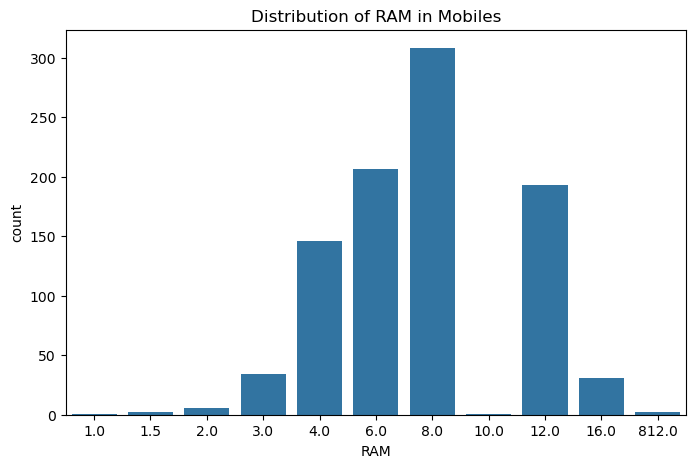

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RAM', data=df)
plt.title('Distribution of RAM in Mobiles')
plt.show()

#### Insight: 6GB and 8GB RAM are the most common, with fewer 12GB+ models.

### 4. Bivariate Analysis (Relationships Between Variables)

#### a. Price vs. RAM

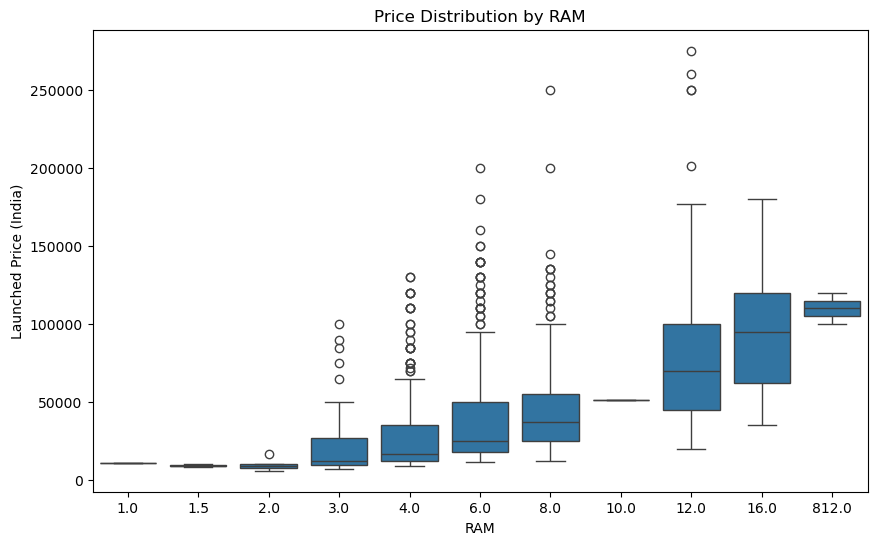

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='Launched Price (India)', data=df)
plt.title('Price Distribution by RAM')
plt.show()

#### Insight: Higher RAM correlates with higher prices, but some 6GB models (e.g., iPhones) are priced higher due to brand value.

#### b. Price vs. Battery Capacity

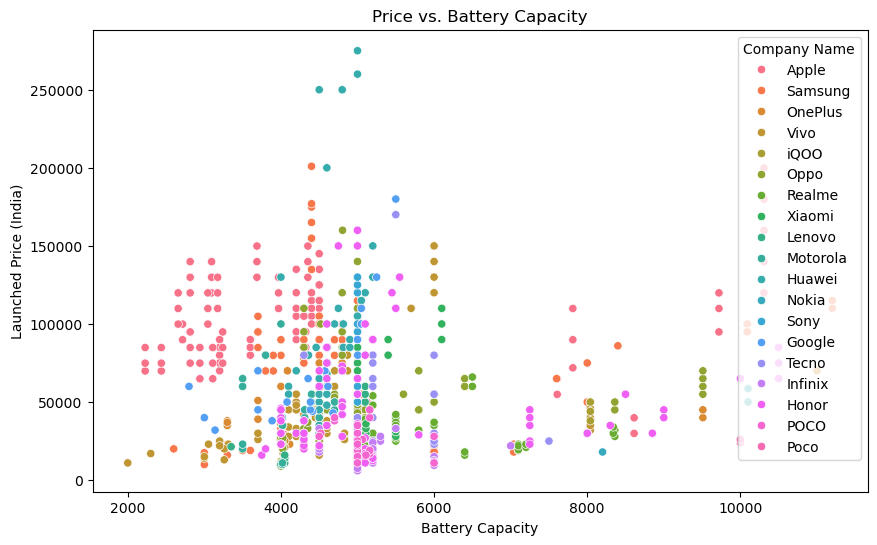

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Capacity', y='Launched Price (India)', data=df, hue='Company Name')
plt.title('Price vs. Battery Capacity')
plt.show()

#### Insight: Most high-battery phones are mid-range. Premium phones (Apple/Samsung) don’t always have the largest batteries.

#### c. Price Trends Over Years

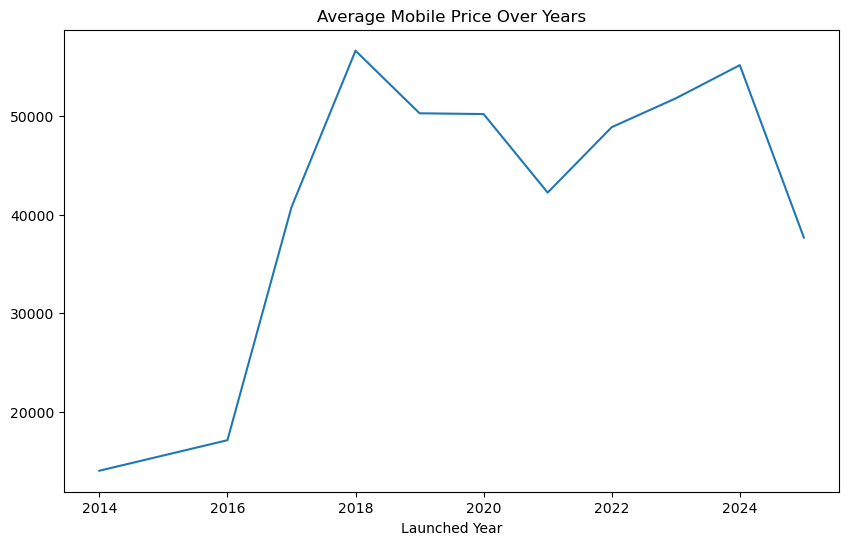

In [18]:
avg_price_by_year = df.groupby('Launched Year')['Launched Price (India)'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
plt.title('Average Mobile Price Over Years')
plt.show()

#### Insight: Prices have been increasing, especially post-2020 but in early-2025 prices decreased.

### 5. Multivariate Analysis (Advanced Insights)

#### a. Price Comparison Across Brands

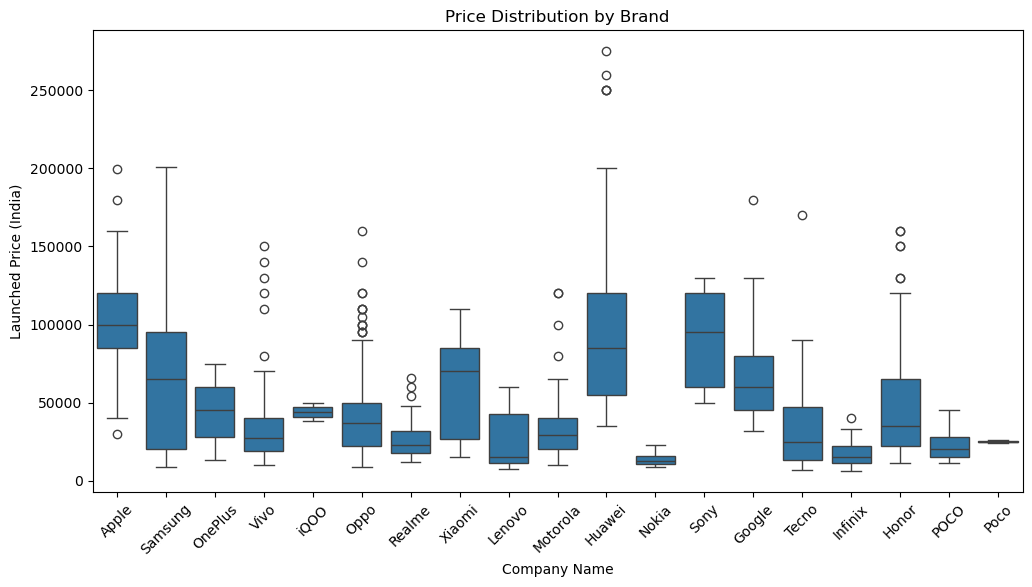

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='Launched Price (India)', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')
plt.show()

#### Insight: Apple has the highest median price, followed by Samsung. Budget brands like Realme and Motorola have lower prices.

#### b. Correlation Heatmap

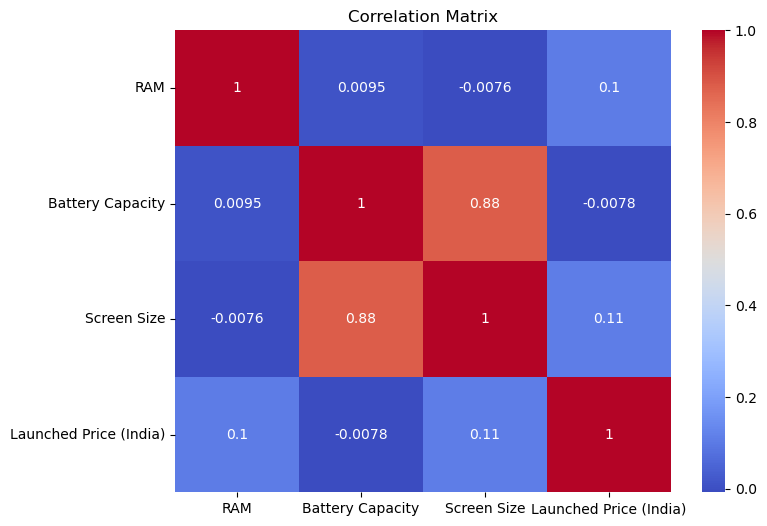

In [25]:
corr = df[['RAM', 'Battery Capacity', 'Screen Size', 'Launched Price (India)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Insight: Battery Capacity & Screen Size strongly correlated with each other, also RAM and screen size have a moderate positive correlation with price.

### 6. Key Insights & Recommendations

#### Insights:


1. Apple & Samsung dominate the premium segment, while Oppo, Vivo, and Xiaomi compete in mid-range.

2. Higher RAM & battery capacity generally increase price, but brand value (e.g., Apple) plays a bigger role.

3. Prices are rising, especially for flagship models.

4. India’s market favors budget to mid-range phones, with fewer ultra-premium buyers.

#### Recommendations:

#### For Premium Brands (Apple/Samsung):

Focus on high-end features (better camera, AI) to justify price.

Introduce financing options to make devices more accessible.

#### For Mid-Range Brands (Oppo, Xiaomi, Vivo):

Compete on battery life and RAM at competitive prices.

Target younger consumers with gaming/performance-focused models.

#### For Budget Brands (Realme, Motorola):

Emphasize value-for-money with decent RAM and battery.

Expand distribution in rural areas where affordability is key.

#### Regional Pricing Strategy:

Adjust prices in different regions (e.g., Pakistan has Higher prices than India).

Offer localized promotions.

### Conclusion
This EDA provides actionable insights for mobile companies to optimize pricing, features, and marketing strategies. Visualizations help identify trends, while statistical analysis reveals key drivers of pricing.